Consider the case where you have multiple flaring data sets. You think that the power law slope is universal, but the flaring intensity will be different in each case, and also detection thresholds, observing times, etc. etc. So let's add the log-likelihood function of all these data sets and require the exponent to be the same for all. This is implemented as `MixedModel` in this section, where we generate some data sets to see how the analysis works.

In [1]:
import numpy as np

# Do some Bayesian flaring analysis!

In [2]:
# get likelihood functions, prior distributions
from siberianpine.loglikelihoods import mixedmodel_loglikelihood
from siberianpine.priors import uninformative_prior, gaussian_prior

# get the analysis toolkit
from siberianpine.bayes import BayesianFlaringAnalysis
from siberianpine.mixedmodel import MixedModel

# get the utils for synthetic data creation
from siberianpine.utils import generate_synthetic_bfa_input

# Define a likelihood function

In [3]:
def my_mixedmodel_loglikelihood(theta, *args):
    def prior(x):
        return gaussian_prior(x, 2., .5) # mu and sigma
    return mixedmodel_loglikelihood(theta, *args, prior=prior)

## Create the model and sample from the posterior

In [4]:
#Produce some synthetic data for testing purposes
BFA = [BayesianFlaringAnalysis(**generate_synthetic_bfa_input(flares_per_day=i)) for i in [2,3,1,.4]]
# Create a model
MM = MixedModel(BFA=BFA, loglikelihood=my_mixedmodel_loglikelihood, alpha_prior=2.)

In [5]:
# Run MCMC to sample the posterior distribution
MM.sample_posterior_with_mcmc()
# This warning: "Initial state is not linearly independent 
# and it will not allow a full exploration 
# of parameter space" appears in the emcee docs 
# and is not concerning anyone in the tutorial, 
# so let's ignore it?

/home/ekaterina/Documents/003_Coding/SiberianPine/siberianpineenv/lib/python3.6/site-packages/emcee-3.0.0-py3.6.egg/emcee/ensemble.py:258: RuntimeWarning: Initial state is not linearly independent and it will not allow a full exploration of parameter space
  category=RuntimeWarning,


## Plot the results

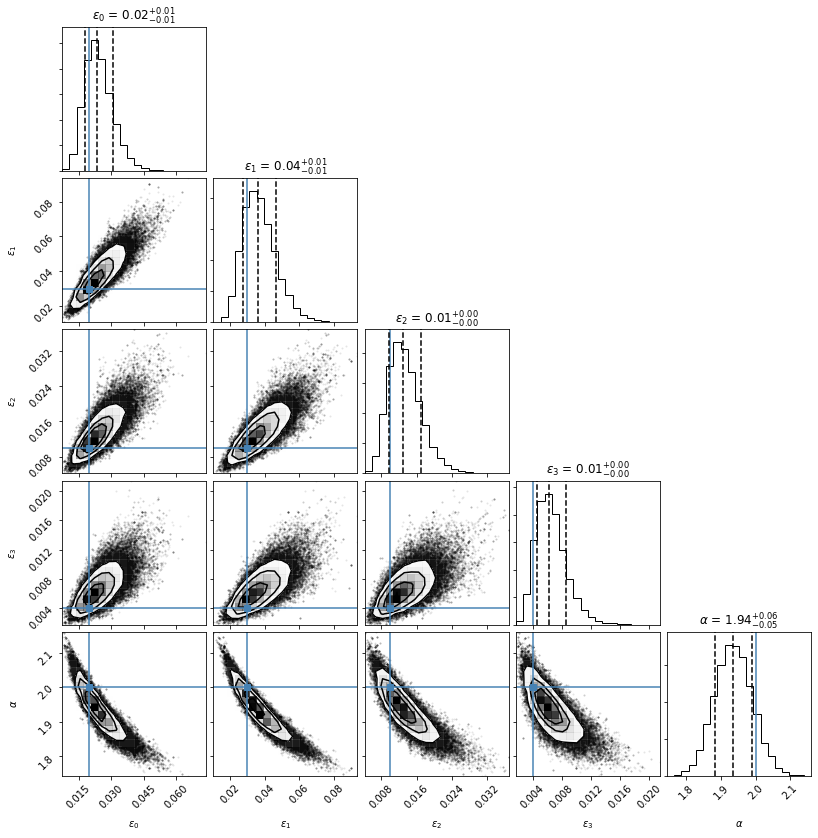

In [6]:
MM.show_corner_plot()